In [1]:
import tensorflow as tf

In [2]:
def add_layer(inputs, in_size, out_size, active_func=None):
    weight = tf.Variable(tf.random_normal([in_size, out_size]))
    baises = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, weight) + baises
    if active_func is None:
        outputs = Wx_plus_b
    else:
        outputs = active_func(Wx_plus_b)
    return outputs


In [3]:
import numpy as np

In [4]:
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

In [5]:
xs = tf.placeholder(tf.float32,[None, 1])
ys = tf.placeholder(tf.float32,[None, 1])

In [7]:
l1 = add_layer(xs, 1, 10, tf.nn.relu)
prediction = add_layer(l1, 10 ,1, None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [8]:
init = tf.global_variables_initializer()

In [32]:
import matplotlib.pyplot as plt
%matplotlib auto

Using matplotlib backend: Qt5Agg


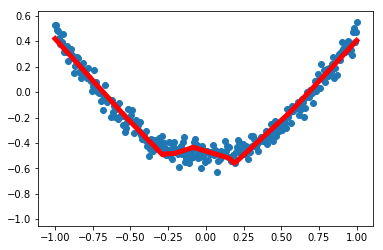

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show(block=False)

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        # training
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
            # to visualize the result and improvement
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs: x_data})
            # plot the prediction
            lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
            plt.pause(0.1)
